In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = 'sp500_companies.csv' 
data = pd.read_csv(file_path)

In [4]:
data = data.drop_duplicates()
data = data.dropna()

In [5]:
data.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,141.95,3476355547136,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.062610
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,229.87,3474668650496,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.062579
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,417.00,3100344844288,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.055838
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,197.12,2072716771328,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.037330
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,164.76,2026844585984,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.036504


In [6]:
data['Marketcap'] = pd.to_numeric(data['Marketcap'], errors='coerce')
data['Ebitda'] = pd.to_numeric(data['Ebitda'], errors='coerce')
data['Revenuegrowth'] = pd.to_numeric(data['Revenuegrowth'], errors='coerce')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 0 to 500
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             443 non-null    object 
 1   Symbol               443 non-null    object 
 2   Shortname            443 non-null    object 
 3   Longname             443 non-null    object 
 4   Sector               443 non-null    object 
 5   Industry             443 non-null    object 
 6   Currentprice         443 non-null    float64
 7   Marketcap            443 non-null    int64  
 8   Ebitda               443 non-null    float64
 9   Revenuegrowth        443 non-null    float64
 10  City                 443 non-null    object 
 11  State                443 non-null    object 
 12  Country              443 non-null    object 
 13  Fulltimeemployees    443 non-null    float64
 14  Longbusinesssummary  443 non-null    object 
 15  Weight               443 non-null    float64


In [18]:
highest_marketcap_company = data.loc[data['Marketcap'].idxmax(), ['Longname', 'Marketcap']]

highest_ebitda_company = data.loc[data['Ebitda'].idxmax(), ['Longname', 'Ebitda']]

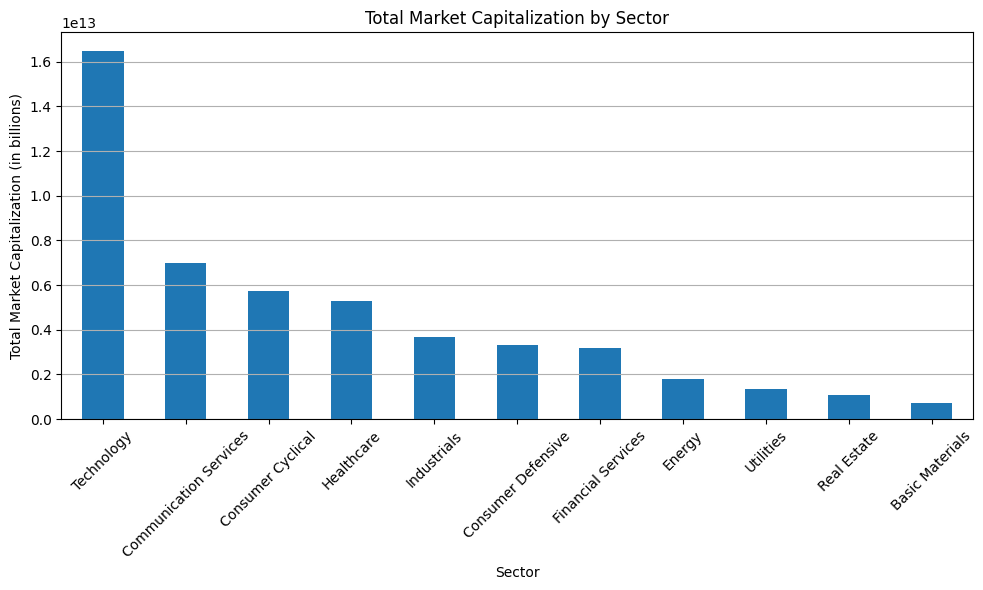

In [19]:
#Total Market Capitalization by Sector
sector_marketcap = data.groupby('Sector')['Marketcap'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sector_marketcap.plot(kind='bar')
plt.title('Total Market Capitalization by Sector')
plt.xlabel('Sector')
plt.ylabel('Total Market Capitalization (in billions)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

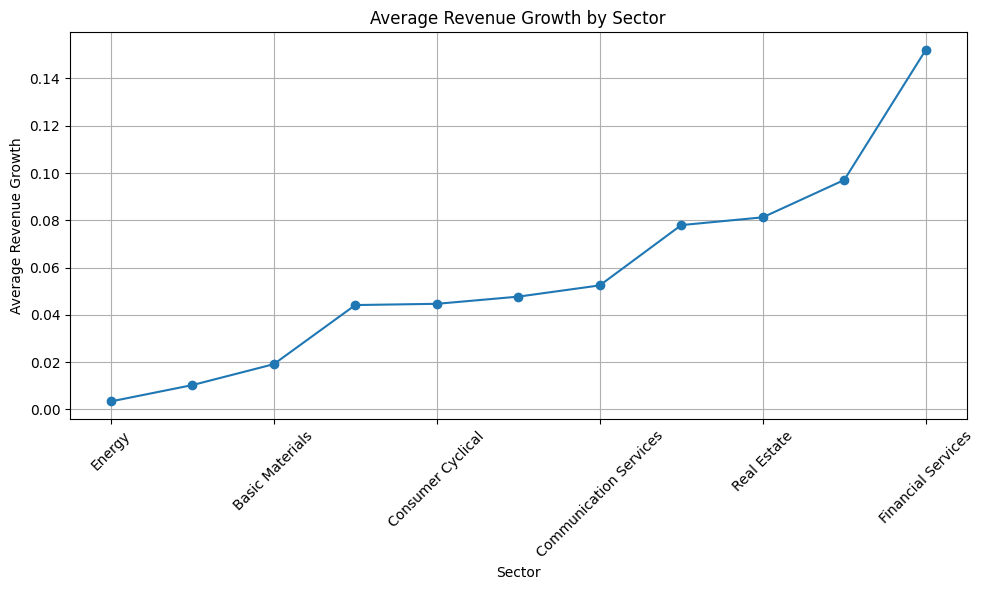

In [10]:
#Average Revenue Growth Over Sectors
sector_revenue_growth = data.groupby('Sector')['Revenuegrowth'].mean().sort_values()
plt.figure(figsize=(10, 6))
sector_revenue_growth.plot(kind='line', marker='o')
plt.title('Average Revenue Growth by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Revenue Growth')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [12]:
import yfinance as yf
from datetime import datetime, timedelta
from tqdm import tqdm  # Import tqdm for progress bar

# Calculate the date one year ago from today
one_year_ago = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')

# Create a function to get historical price for a symbol
def get_historical_price(symbol):
    try:
        # Get the stock data
        stock = yf.Ticker(symbol)
        # Get historical data for the past year
        hist = stock.history(start=one_year_ago)
        # Return the first closing price if available
        if not hist.empty:
            return hist.iloc[0]['Close']
        return None
    except:
        return None

# Add initial price column with progress bar
tqdm.pandas(desc="Fetching historical prices")  # Initialize tqdm for pandas
data['InitPrice'] = data['Symbol'].progress_apply(get_historical_price)

# Display the first few rows to verify the results
print("\nFirst few rows with initial prices:")
print(data[['Symbol', 'InitPrice']].head())

Fetching historical prices: 100%|██████████| 443/443 [02:27<00:00,  2.99it/s]


First few rows with initial prices:
  Symbol   InitPrice
0   NVDA   45.496231
1   AAPL  188.506485
2   MSFT  366.400085
3   AMZN  144.839996
4  GOOGL  128.950699


In [13]:
data.columns

Index(['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight',
       'InitPrice'],
      dtype='object')

In [13]:
#task 1
data['PriceIncrease'] = data['Currentprice'] - data['InitPrice']

highest_increase_company = data.loc[data['PriceIncrease'].idxmax()]

print(f"company with the highest stock price increase during the period: {highest_increase_company['Symbol']}")


company with the highest stock price increase during the period: NVR


In [14]:
#task 2
highest_marketcap_company = data.loc[data['Marketcap'].idxmax()]

print("Comapany with the highest market capitalization:")
print(highest_marketcap_company[['Symbol', 'Shortname', 'Marketcap']])


Comapany with the highest market capitalization:
Symbol                     NVDA
Shortname    NVIDIA Corporation
Marketcap         3476355547136
Name: 0, dtype: object


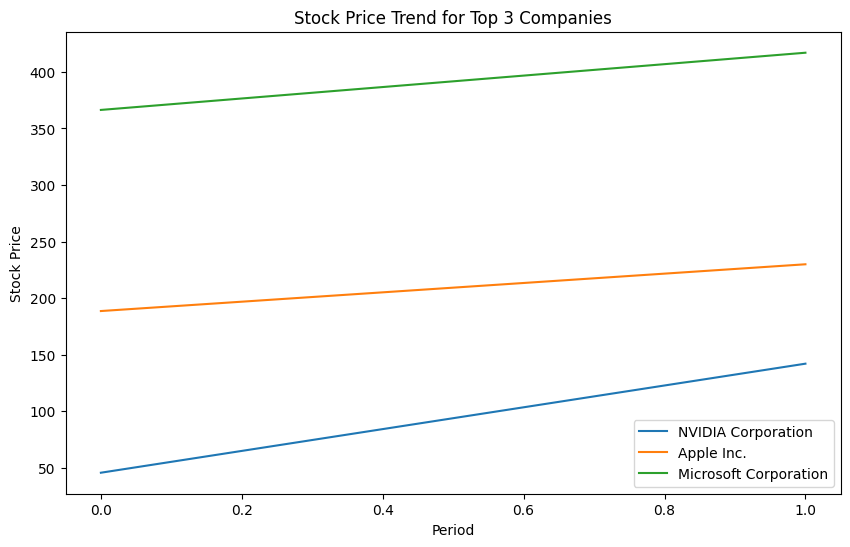

In [15]:
#task 3
import matplotlib.pyplot as plt

# top 3 companies by market capitalization
top_3_companies = data.nlargest(3, 'Marketcap')

# Plotting the graph
plt.figure(figsize=(10, 6))

for _, row in top_3_companies.iterrows():
    plt.plot([row['InitPrice'], row['Currentprice']], label=row['Shortname'])

plt.title("Stock Price Trend for Top 3 Companies")
plt.xlabel("Period")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [16]:
import yfinance as yf
from datetime import datetime
from tqdm import tqdm
import pandas as pd

# Define the date range
start_date = '2023-12-01'
end_date = '2024-12-01'

# Create an empty list to store data
historical_data = []

# Get data for each symbol with progress bar
for symbol in tqdm(data['Symbol'], desc="Fetching historical data"):
    try:
        # Get the stock data
        stock = yf.Ticker(symbol)
        # Get historical data
        hist = stock.history(start=start_date, end=end_date)
        
        # If we have data, add it to our list
        if not hist.empty:
            # Add symbol and date as columns
            hist['Symbol'] = symbol
            hist.reset_index(inplace=True)  # Make Date a column instead of index
            
            # Select only the columns we want
            hist = hist[['Date', 'Symbol', 'Open', 'Close']]
            
            historical_data.append(hist)
            
    except Exception as e:
        print(f"Error fetching data for {symbol}: {str(e)}")
        continue

# Combine all data into a single dataframe
historical_data = pd.concat(historical_data, ignore_index=True)

# Sort by Symbol and Date
historical_data = historical_data.sort_values(['Symbol', 'Date'])

# Display the first few rows to verify the results
print("\nFirst few rows of historical data:")
print(historical_data.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(historical_data.info())

Fetching historical data: 100%|██████████| 443/443 [01:25<00:00,  5.16it/s]



First few rows of historical data:
                           Date Symbol        Open       Close
54135 2023-12-01 00:00:00-05:00      A  126.482353  127.922585
54136 2023-12-04 00:00:00-05:00      A  127.545142  128.011978
54137 2023-12-05 00:00:00-05:00      A  126.949171  127.018700
54138 2023-12-06 00:00:00-05:00      A  127.634521  128.041763
54139 2023-12-07 00:00:00-05:00      A  128.329818  127.813316

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 111112 entries, 54135 to 28281
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype                           
---  ------  --------------   -----                           
 0   Date    111112 non-null  datetime64[ns, America/New_York]
 1   Symbol  111112 non-null  object                          
 2   Open    111112 non-null  float64                         
 3   Close   111112 non-null  float64                         
dtypes: datetime64[ns, America/New_York](1), float64(2), object(1)
memory usage: 4.2+

In [18]:
historical_data['Symbol'].unique()

array(['A', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ADBE', 'ADI', 'ADM', 'ADP',
       'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM',
       'ALB', 'ALGN', 'ALL', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMZN', 'ANET',
       'ANSS', 'AOS', 'APA', 'APD', 'APH', 'ARE', 'ATO', 'AVB', 'AVGO',
       'AVY', 'AWK', 'AXON', 'AZO', 'BA', 'BALL', 'BAX', 'BBY', 'BDX',
       'BEN', 'BF-B', 'BG', 'BIIB', 'BKNG', 'BKR', 'BLDR', 'BLK', 'BMY',
       'BR', 'BRK-B', 'BRO', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CARR',
       'CAT', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CEG',
       'CF', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COO', 'COP', 'COR',
       'COST', 'CPAY', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CRWD', 'CSCO',
       'CSGP', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CVS',
       'CVX', 'CZR', 'D', 'DAL', 'DAY', 'DD', 'DE', 'DECK', 'DELL', 'DG',
       'DGX', 'DHR', 'DIS', 'DLR', 'DLTR', 'DOC', 'DOV', 'DOW


Top 5 Days with Highest Average Price Differences:
Date: 2024-08-08
Average Price Difference: $3.30
------------------------------------------------
Date: 2024-11-05
Average Price Difference: $3.20
------------------------------------------------
Date: 2023-12-13
Average Price Difference: $3.16
------------------------------------------------
Date: 2024-07-16
Average Price Difference: $3.15
------------------------------------------------
Date: 2024-06-17
Average Price Difference: $2.53
------------------------------------------------


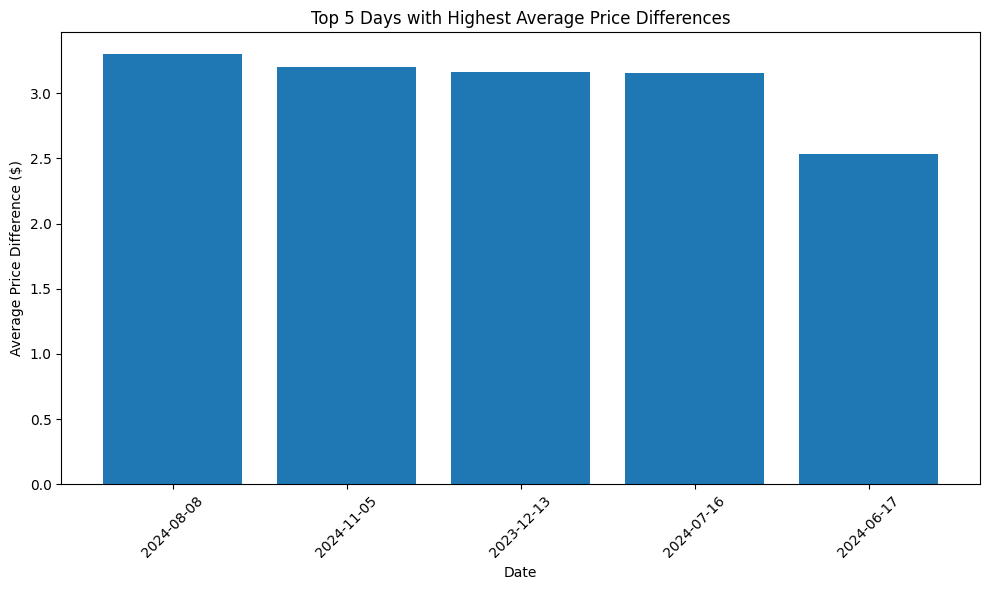

In [ ]:
#TASK 4
# Calculate the difference between close and open prices
historical_data['difference'] = historical_data['Close'] - historical_data['Open']

# Filter out extreme differences (where diff > close*0.5)
filtered_data = historical_data[abs(historical_data['difference']) <= historical_data['Close'] * 0.5]

# Calculate average difference for each day
daily_avg_diff = filtered_data.groupby('Date')['difference'].mean().reset_index()

# Get top 5 days with highest average difference
top_5_days = daily_avg_diff.nlargest(5, 'difference')

# Display results
print("\nTop 5 Days with Highest Average Price Differences:")
print("================================================")
for _, row in top_5_days.iterrows():
    print(f"Date: {row['Date'].strftime('%Y-%m-%d')}")
    print(f"Average Price Difference: ${row['difference']:.2f}")
    print("------------------------------------------------")

# Create visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_5_days['Date'].dt.strftime('%Y-%m-%d'), top_5_days['difference'])
plt.title('Top 5 Days with Highest Average Price Differences')
plt.xlabel('Date')
plt.ylabel('Average Price Difference ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Comparison between Technology and Financial Services Sectors:

Technology Sector:
Count: 74
Average Current Price: 262.92
Total Market Cap: 16490788788224.00
Average Revenue Growth: 0.10

Financial Services Sector:
Count: 33
Average Current Price: 251.18
Total Market Cap: 3192711886848.00
Average Revenue Growth: 0.15


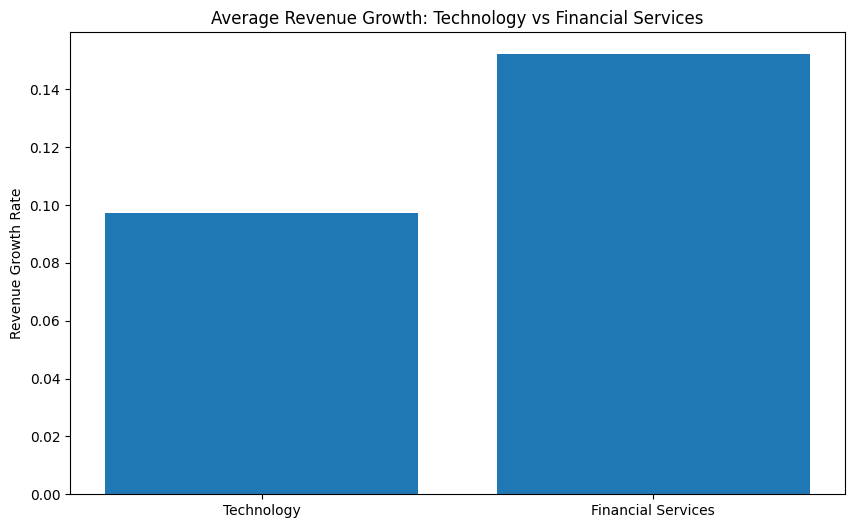

In [29]:
#TASK 5
# Filter companies by sector
tech_companies = data[data['Sector'] == 'Technology']
financial_companies = data[data['Sector'] == 'Financial Services']

# Calculate basic statistics for each sector
tech_stats = {
    'Count': len(tech_companies),
    'Average Current Price': tech_companies['Currentprice'].mean(),
    'Total Market Cap': tech_companies['Marketcap'].sum(),
    'Average Revenue Growth': tech_companies['Revenuegrowth'].mean()
}

financial_stats = {
    'Count': len(financial_companies),
    'Average Current Price': financial_companies['Currentprice'].mean(),
    'Total Market Cap': financial_companies['Marketcap'].sum(),
    'Average Revenue Growth': financial_companies['Revenuegrowth'].mean()
}

# Display comparison
print("\nComparison between Technology and Financial Services Sectors:")
print("\nTechnology Sector:")
for key, value in tech_stats.items():
    if 'Count' in key:
        print(f"{key}: {value:.0f}")
    else:
        print(f"{key}: {value:.2f}")

print("\nFinancial Services Sector:")
for key, value in financial_stats.items():
    if 'Count' in key:
        print(f"{key}: {value:.0f}")
    else:
        print(f"{key}: {value:.2f}")

# Create a bar plot comparing revenue growth
plt.figure(figsize=(10, 6))
sectors = ['Technology', 'Financial Services']
growth_rates = [tech_stats['Average Revenue Growth'], financial_stats['Average Revenue Growth']]
plt.bar(sectors, growth_rates)
plt.title('Average Revenue Growth: Technology vs Financial Services')
plt.ylabel('Revenue Growth Rate')
plt.show()